In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def __map1(item):
    image = tf.cast(item["image"], tf.float32)
    image = image / 256.
    noise = tf.random.uniform(tf.shape(item["image"]))
    image_and_noise = image + noise * 0.5
    image_and_noise = tf.clip_by_value(image_and_noise, clip_value_min=0., clip_value_max=1.)
    
    return (image_and_noise, image)

fashion_mnist = tfds.load("fashion_mnist")
train_ds = fashion_mnist["train"]
train_ds = train_ds.map(__map1).shuffle(1000).batch(32)
valid_ds = fashion_mnist["test"]
valid_ds = valid_ds.map(__map1).shuffle(1000).batch(32)


In [12]:
(cifar10_train_images, cifar10_train_labels) , (cifar10_valid_images, cifar10_valid_labels) = tf.keras.datasets.cifar10.load_data()
cifar10_class_names = class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

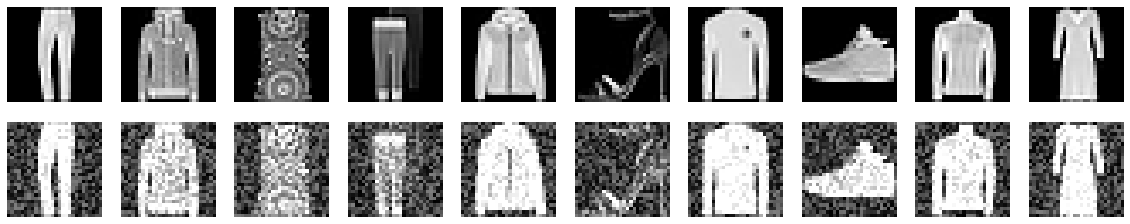

In [3]:
def plot_pictures(model = None):
    plt.figure(figsize=(20, 6))
    for idx, (item) in zip(range(10), valid_ds):
        img_orig = item[1][0]
        plt.subplot(3, 10, idx + 1)
        plt.imshow(img_orig, cmap="gray")
        plt.axis(False)

        img_orig = item[0][0]
        plt.subplot(3, 10, idx + 10 + 1)
        plt.imshow(img_orig, cmap="gray")
        plt.axis(False)

        if(model):
            img_generated = model(item[0])[0]
            plt.subplot(3, 10, idx + 1 + 20)
            plt.imshow(img_generated, cmap="gray")
            plt.axis(False)

plot_pictures()

In [4]:
next(iter(train_ds))

(<tf.Tensor: shape=(32, 28, 28, 1), dtype=float32, numpy=
 array([[[[0.24149036],
          [0.15998071],
          [0.18135637],
          ...,
          [0.24179769],
          [0.16717893],
          [0.34297746]],
 
         [[0.02283466],
          [0.11635572],
          [0.1512217 ],
          ...,
          [0.34362787],
          [0.3292609 ],
          [0.3005054 ]],
 
         [[0.2497356 ],
          [0.44118828],
          [0.14857322],
          ...,
          [0.03179628],
          [0.1905027 ],
          [0.21992737]],
 
         ...,
 
         [[0.22564894],
          [0.13779831],
          [0.09272939],
          ...,
          [0.34713656],
          [0.27159154],
          [0.23375428]],
 
         [[0.36991698],
          [0.02383   ],
          [0.11150265],
          ...,
          [0.39055526],
          [0.11851341],
          [0.4031747 ]],
 
         [[0.04258418],
          [0.10700822],
          [0.30308002],
          ...,
          [0.4868582 ],
     

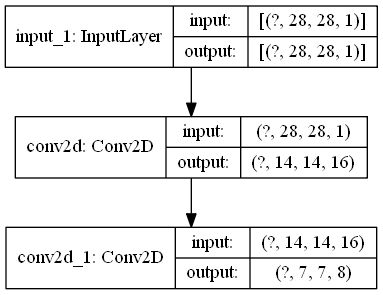

In [5]:
class Autoencoder(tf.keras.models.Model):
    def __init__(self, encoding_dims):
        super(Autoencoder, self).__init__()
        
        self.encoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28,28,1)),
            tf.keras.layers.Conv2D(16, kernel_size=3, strides=2, padding="same", activation="relu"),
            tf.keras.layers.Conv2D(encoding_dims, kernel_size=3, strides=2, padding="same", activation="relu"),
        ])

        self.decoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(7,7,encoding_dims)),
            tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, padding="same", activation="relu"),
            tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="relu"),
            tf.keras.layers.Conv2D(1, kernel_size=3, padding="same", activation="relu"),
        ])


        
    def call(self, inputs, training=True):
        x = self.encoder(inputs, training=True)
        x = self.decoder(x, training=True)

        return x
    
model = Autoencoder(8)
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())
tf.keras.utils.plot_model(model.encoder, show_shapes=True, dpi=96, expand_nested=True)


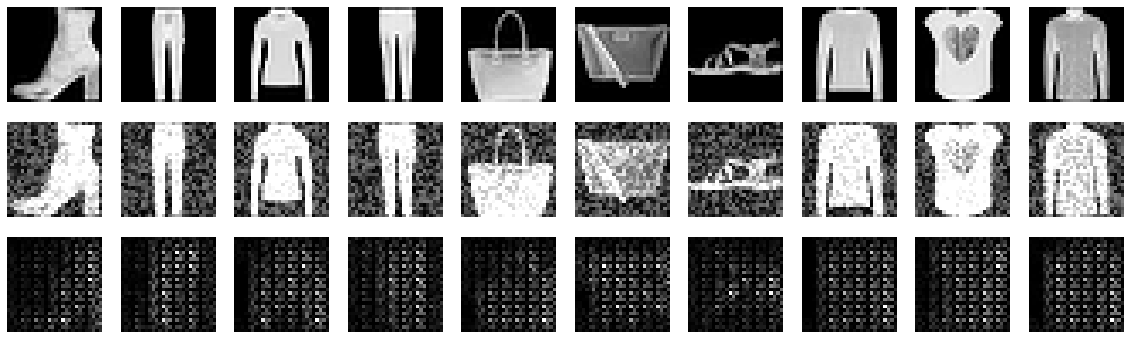

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0137
End epoch 0 of training; got log keys: ['loss', 'val_loss']


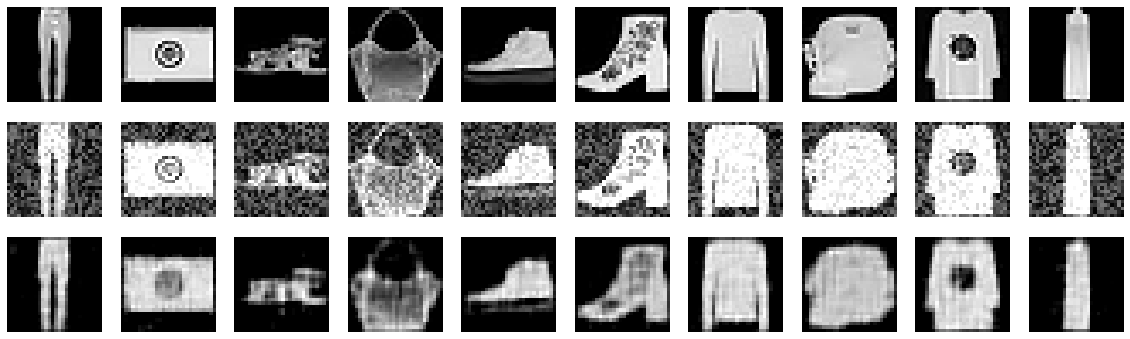

1875/1875 [==============================] - 73s 39ms/step - loss: 0.0137 - val_loss: 0.0077
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0074
End epoch 1 of training; got log keys: ['loss', 'val_loss']


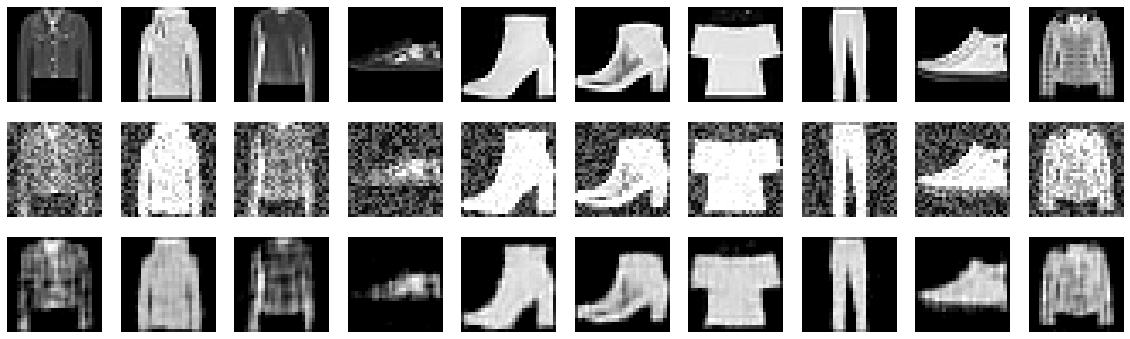

1875/1875 [==============================] - 71s 38ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0070
End epoch 2 of training; got log keys: ['loss', 'val_loss']


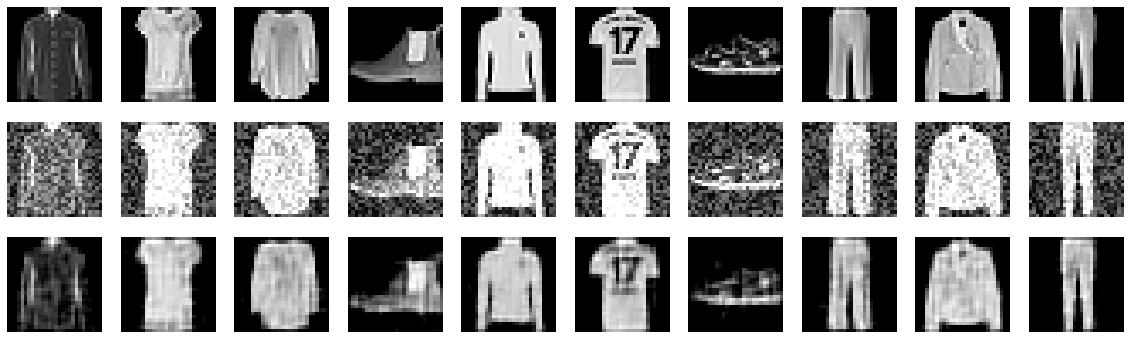

1875/1875 [==============================] - 77s 41ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0067
End epoch 3 of training; got log keys: ['loss', 'val_loss']


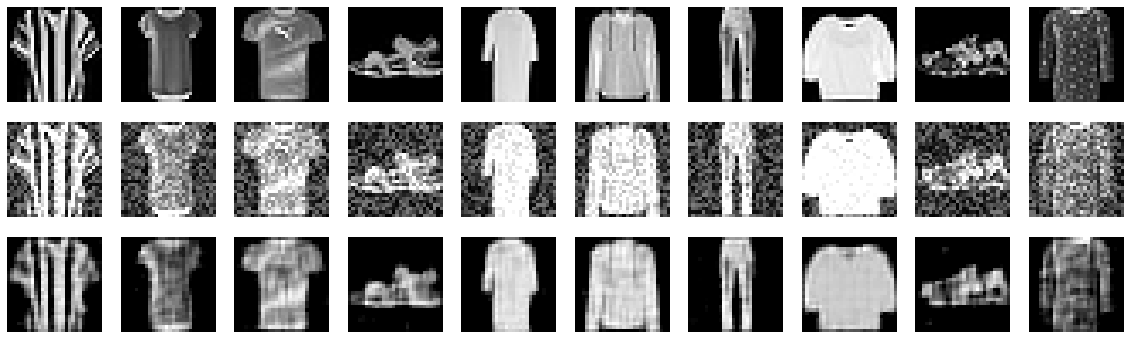

1875/1875 [==============================] - 70s 38ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 5/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0066
End epoch 4 of training; got log keys: ['loss', 'val_loss']


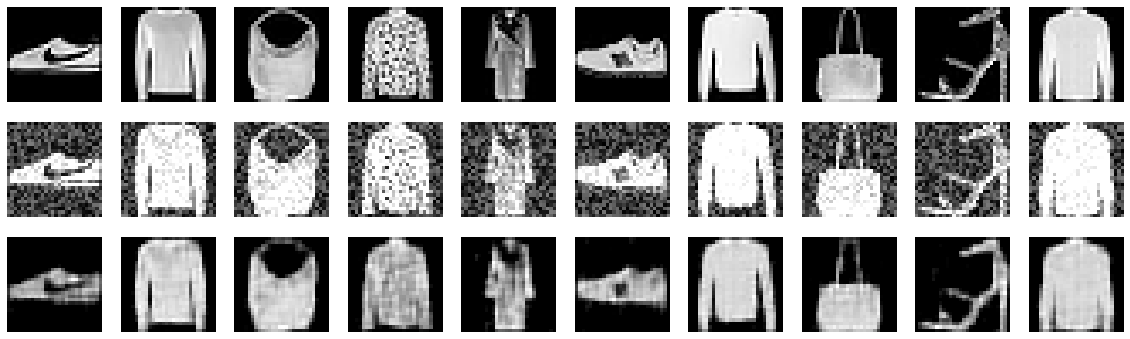

1875/1875 [==============================] - 75s 40ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 6/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0065
End epoch 5 of training; got log keys: ['loss', 'val_loss']


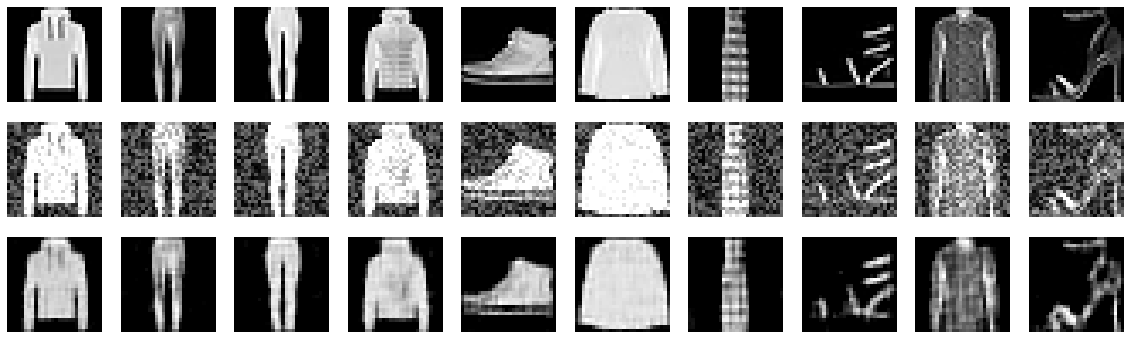

1875/1875 [==============================] - 82s 43ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 7/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0063
End epoch 6 of training; got log keys: ['loss', 'val_loss']


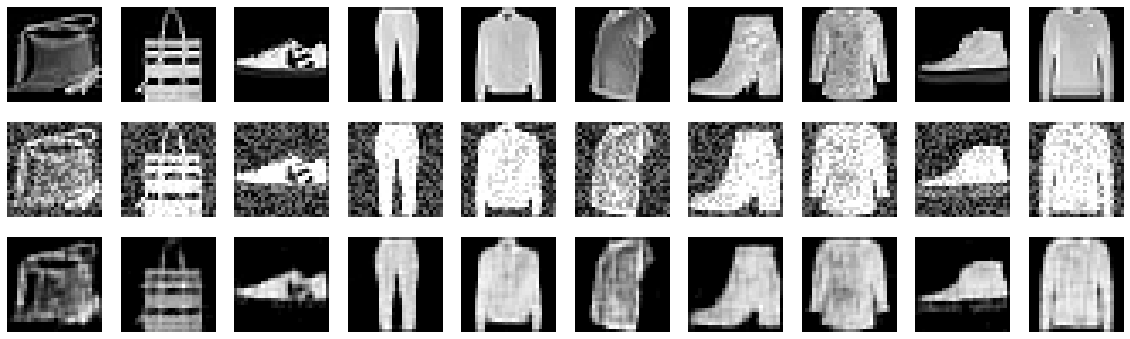

1875/1875 [==============================] - 76s 40ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 8/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0061
End epoch 7 of training; got log keys: ['loss', 'val_loss']


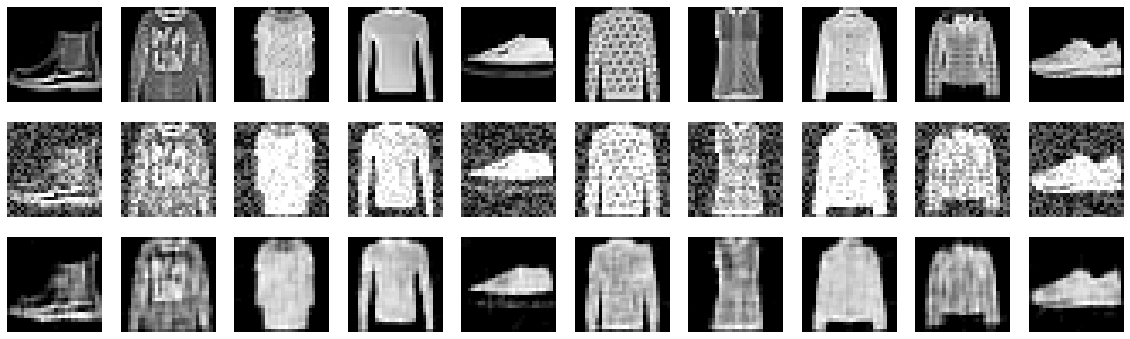

1875/1875 [==============================] - 76s 40ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 9/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0060
End epoch 8 of training; got log keys: ['loss', 'val_loss']


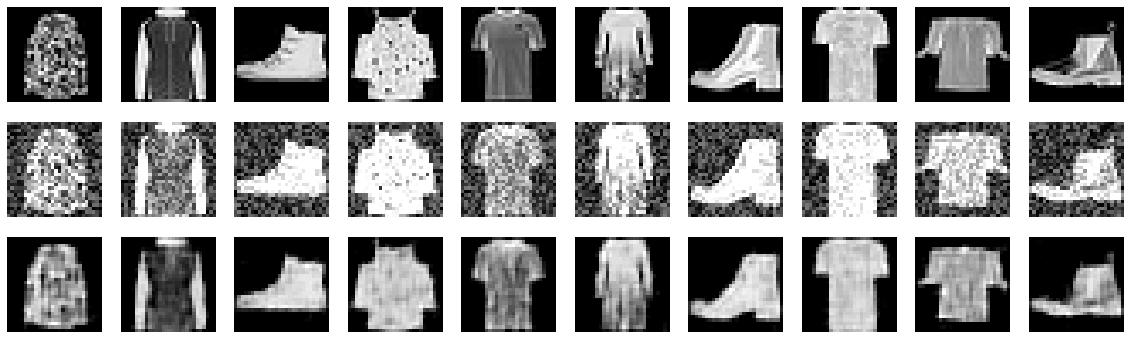

1875/1875 [==============================] - 75s 40ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 10/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0059
End epoch 9 of training; got log keys: ['loss', 'val_loss']


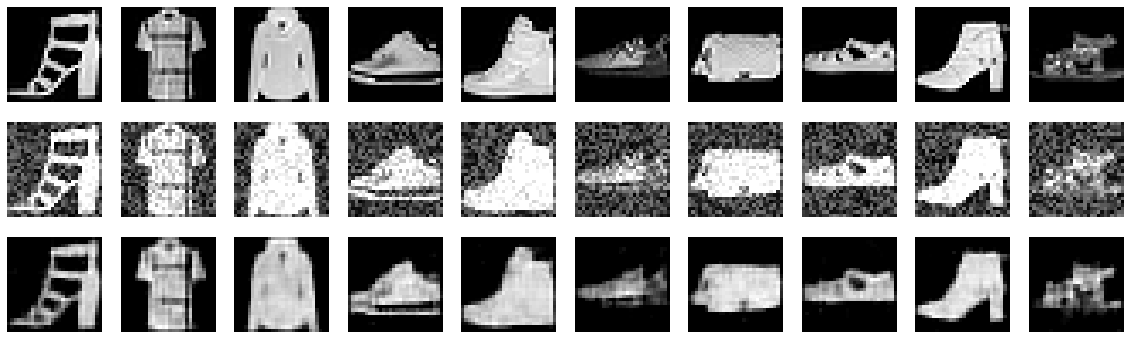

1875/1875 [==============================] - 75s 40ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 11/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0058
End epoch 10 of training; got log keys: ['loss', 'val_loss']


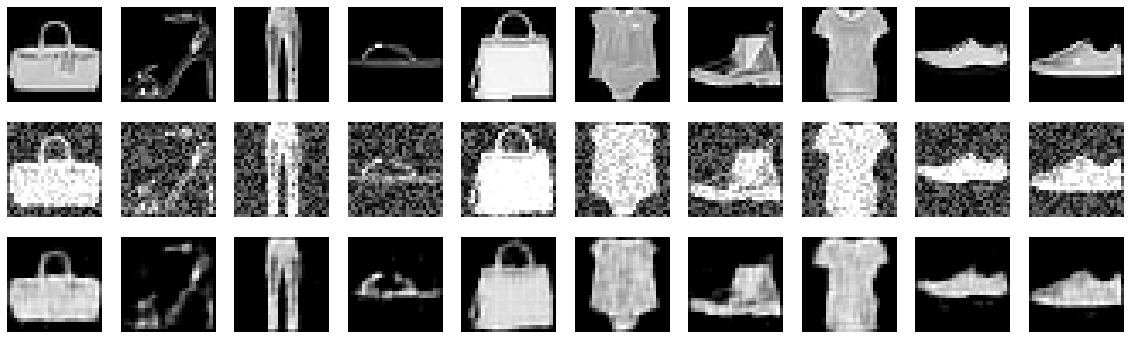

1875/1875 [==============================] - 83s 44ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 12/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0058
End epoch 11 of training; got log keys: ['loss', 'val_loss']


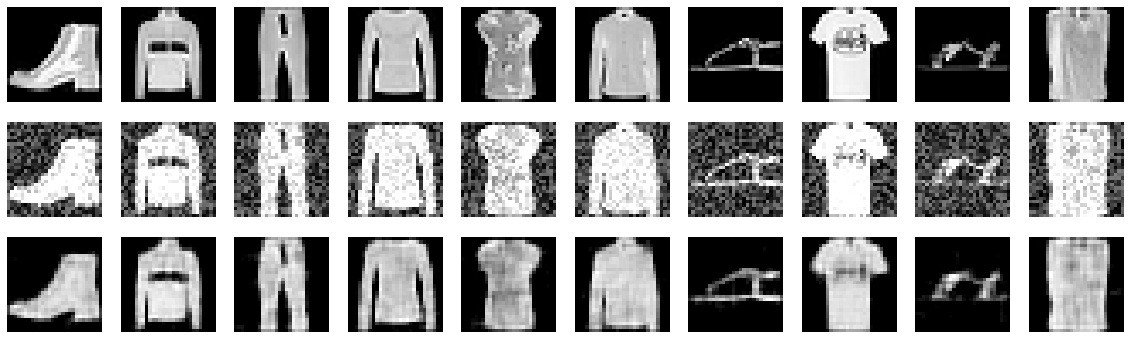

1875/1875 [==============================] - 77s 41ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 13/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0057
End epoch 12 of training; got log keys: ['loss', 'val_loss']


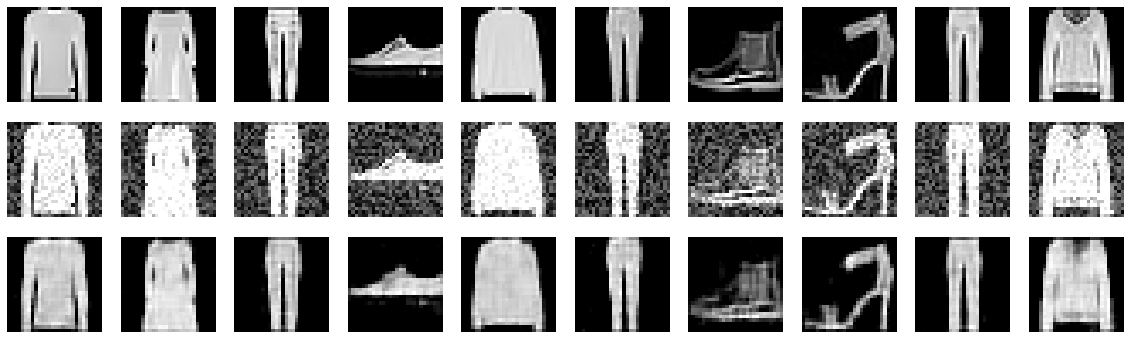

1875/1875 [==============================] - 76s 41ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 14/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0057
End epoch 13 of training; got log keys: ['loss', 'val_loss']


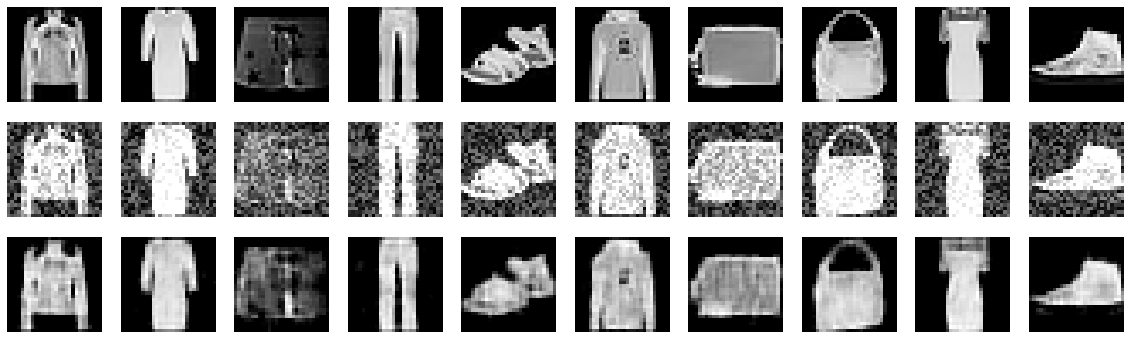

1875/1875 [==============================] - 74s 40ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 15/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0056
End epoch 14 of training; got log keys: ['loss', 'val_loss']


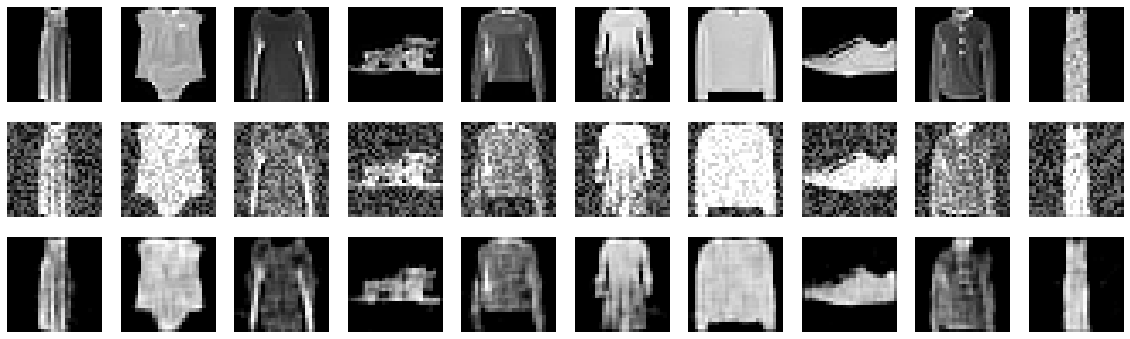

1875/1875 [==============================] - 76s 41ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 16/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0056
End epoch 15 of training; got log keys: ['loss', 'val_loss']


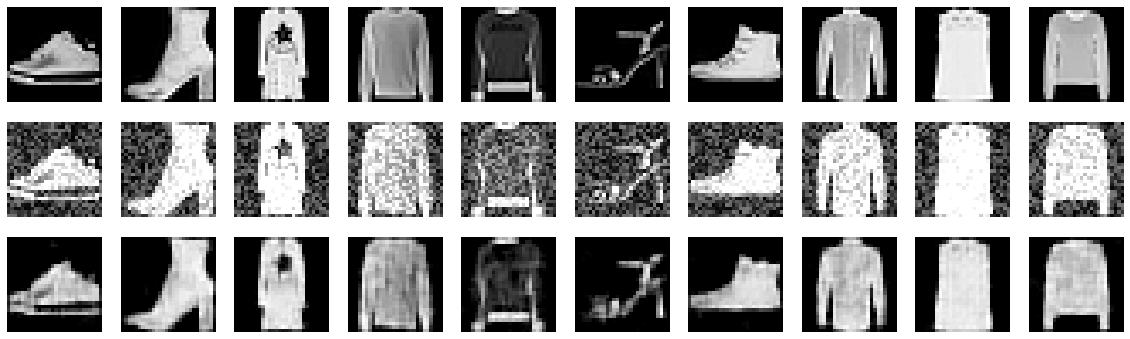

1875/1875 [==============================] - 75s 40ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 17/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0056
End epoch 16 of training; got log keys: ['loss', 'val_loss']


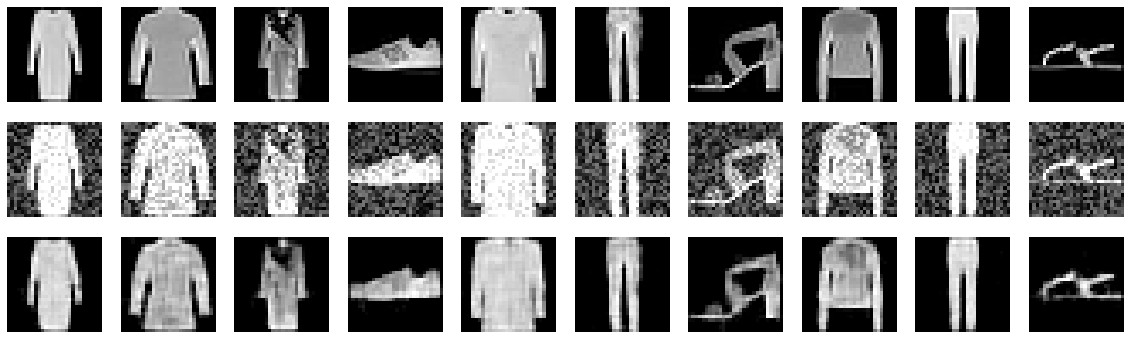

1875/1875 [==============================] - 82s 44ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 18/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0055
End epoch 17 of training; got log keys: ['loss', 'val_loss']


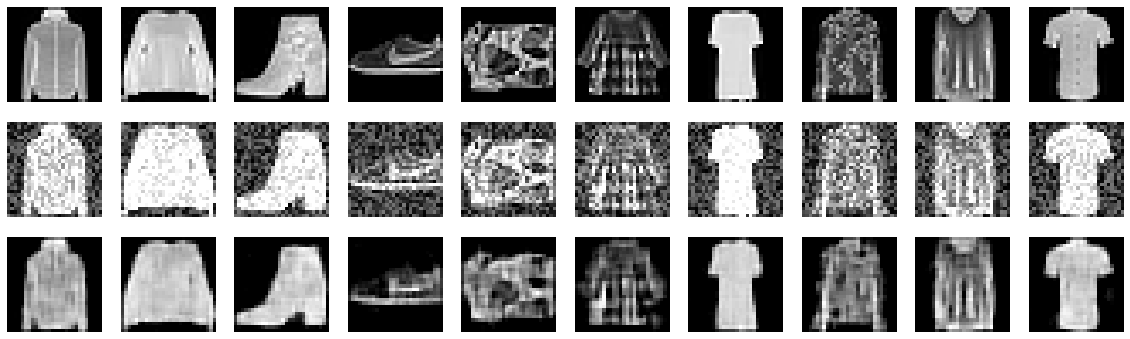

1875/1875 [==============================] - 75s 40ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 19/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0055
End epoch 18 of training; got log keys: ['loss', 'val_loss']


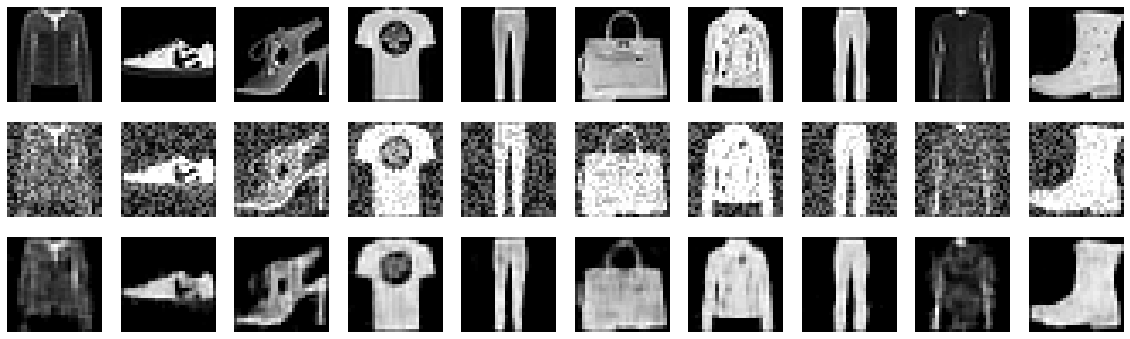

1875/1875 [==============================] - 75s 40ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 20/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0055
End epoch 19 of training; got log keys: ['loss', 'val_loss']


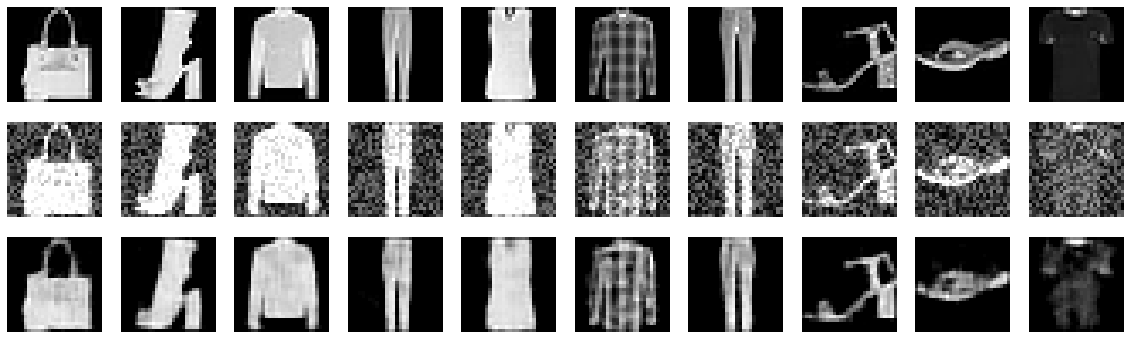

1875/1875 [==============================] - 74s 39ms/step - loss: 0.0055 - val_loss: 0.0055


In [59]:
EPOCHS=20

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print()
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))
        plot_pictures(model)
        plt.show()

plot_pictures(model)
plt.show()

history = model.fit(
    train_ds, 
    epochs=EPOCHS, 
    validation_data=valid_ds,
    callbacks = [CustomCallback()]
                   )

In [19]:
pd.DataFrame(history.history).plot()
plt.show()

NameError: name 'history' is not defined

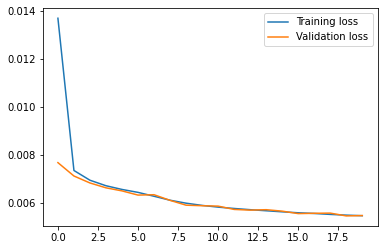

In [61]:
training_loss = history.history["loss"]
training_val_loss = history.history["val_loss"]

plt.plot(training_loss)
plt.plot(training_val_loss)
# plt.ylim(0, 1)
plt.legend(["Training loss", "Validation loss"])
plt.show()